### Feature Engineering
#### After cleaning the data in the previous notebook, we will proceed in analysing the features in the cleaned data, creating new features and analyse their significance in predicting the presence of West Nile Virus.

- 1. Analyse Weather Elements
- 2. Features for rolling window for TAvg, DewPoint, PrecipTotal, some feature for sunrise and sunset, and calculate relative humidity
- 2. Feature for Date/Time
- 3. Feature for Lat/Long (Cluster and calculate distance)
- 4. Create Dummies for Trap and CodeSum
- 5. Save train and test data for modelling






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import DBSCAN,KMeans

In [ ]:
#Load the datasets
df = pd.read_csv("/datasets/data/cleaned_traindf.csv")
df_test = pd.read_csv("/datasets/data/cleaned_testdf.csv")

In [ ]:
df_test.shape

(116293, 33)

In [ ]:
df.describe(include="all")

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,SeaLevel,ResultSpeed,AvgSpeed,Month
count,8610,8610,8610,8610.000000,8610,8610,8610,8610.000000,8610.000000,8610.000000,...,8610.000000,8610,8610.0,0.0,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610
unique,95,138,7,NaN,128,136,138,NaN,NaN,NaN,...,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,NaN,S ASHLAND AVE,T900,"1000 W OHARE AIRPORT, Chicago, IL",NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,August
freq,283,182,3899,NaN,243,182,182,NaN,NaN,NaN,...,NaN,4728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2835
mean,NaN,NaN,NaN,38.793380,NaN,NaN,NaN,41.844422,-87.695237,7.936121,...,1868.086992,NaN,0.0,NaN,0.000019,0.158244,29.961116,5.987445,7.505087,NaN
std,NaN,NaN,NaN,24.129378,NaN,NaN,NaN,0.107076,0.084921,1.326695,...,65.110913,NaN,0.0,NaN,0.000137,0.402378,0.119951,2.873824,2.519970,NaN
min,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.644612,-87.930995,3.000000,...,1720.000000,NaN,0.0,NaN,0.000000,0.000000,29.590000,0.100000,2.100000,NaN
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,41.750498,-87.752411,8.000000,...,1826.000000,NaN,0.0,NaN,0.000000,0.000000,29.880000,3.900000,5.800000,NaN
50%,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,41.857402,-87.694991,8.000000,...,1904.000000,NaN,0.0,NaN,0.000000,0.000000,29.960000,5.800000,7.200000,NaN
75%,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,41.944869,-87.642984,9.000000,...,1924.000000,NaN,0.0,NaN,0.000000,0.130000,30.050000,7.800000,9.200000,NaN


## 1. Analyse Weather Elements

In [ ]:
def line(row,col,n,x,xlabel,y,ylabel,color):
    plt.subplot(row,col,n)
    sns.lineplot(x=x, y=y, data=df, hue='WnvPresent')
    plt.ylabel(ylabel, fontsize=10, color=color)
    plt.xlabel(xlabel, fontsize=10)
    return

def scatter(row,col,n,x,xlabel,y,ylabel,color):
    plt.subplot(row,col,n)
    sns.scatterplot(x=x, y=y, data=df, hue='WnvPresent')
    plt.ylabel(ylabel, fontsize=10, color=color)
    plt.xlabel(xlabel, fontsize=10)
    return

def box(row,col,n,x,xlabel,y,ylabel,color):
    plt.subplot(row,col,n)
    sns.boxplot(x=x, y=y, data=df, hue='WnvPresent')
    plt.ylabel(ylabel, fontsize=10, color=color)
    plt.xlabel(xlabel, fontsize=10)
    return

def bar(row,col,n,x,xlabel,y,ylabel,color):
    plt.subplot(row,col,n)
    sns.barplot(x=x, y=y, data=df, hue='WnvPresent')
    plt.ylabel(ylabel, fontsize=10, color=color)
    plt.xlabel(xlabel, fontsize=10)
    return

In [ ]:
df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,SeaLevel,ResultSpeed,AvgSpeed,Month
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
3,2007-05-29,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17.0,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
4,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71.0,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September
8606,2013-09-26,"9100 West Higgins Road, Rosemont, IL 60018, USA",CULEX RESTUANS,91.0,W HIGGINS RD,T009,"9100 W HIGGINS RD, Chicago, IL",41.992478,-87.862995,8.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September
8607,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10.0,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September
8608,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10.0,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September


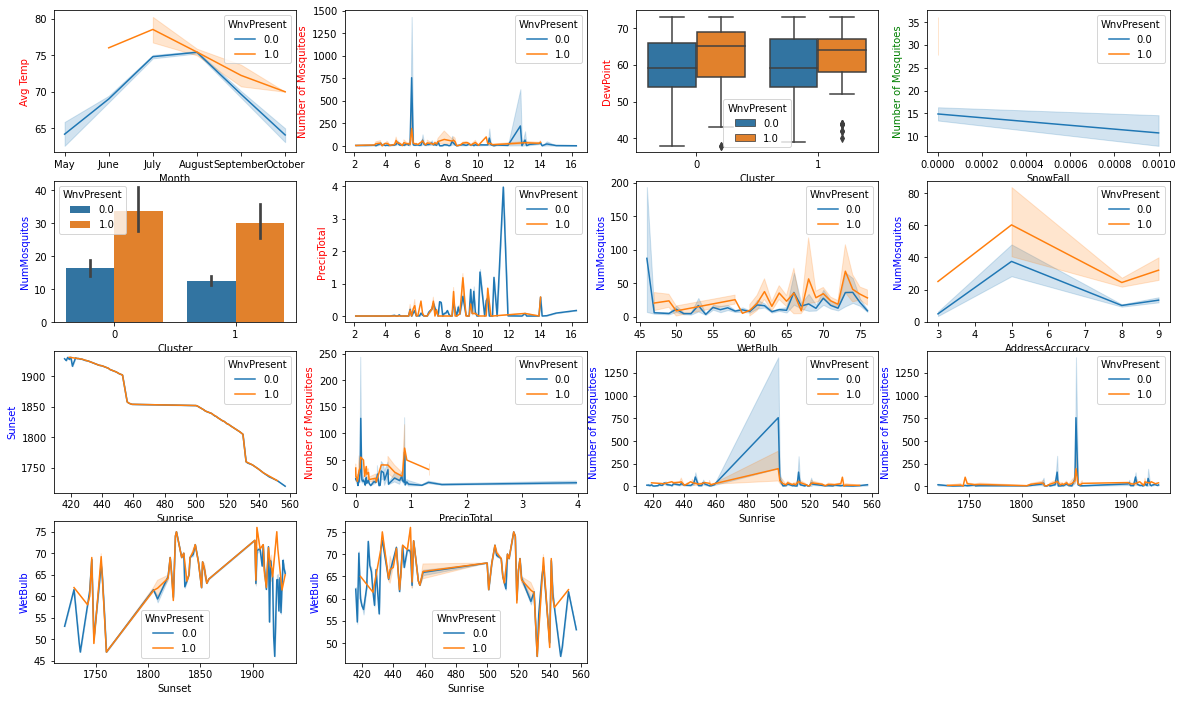

In [ ]:
fig = plt.figure(figsize=(20,12))
line(4,4,1,'Month','Month','Tavg','Avg Temp','red')
line(4,4,2,'AvgSpeed','Avg Speed','NumMosquitos','Number of Mosquitoes','red')
box(4,4,3,'cluster','Cluster','DewPoint','DewPoint','red')
line(4,4,4,'SnowFall','SnowFall','NumMosquitos','Number of Mosquitoes','Green')
bar(4,4,5, 'cluster', 'Cluster','NumMosquitos','NumMosquitos', 'blue')
line(4,4,6,'AvgSpeed','Avg Speed','PrecipTotal','PrecipTotal','red')
line(4,4,7,'WetBulb','WetBulb','NumMosquitos','NumMosquitos', 'blue')
line(4,4,8,'AddressAccuracy','AddressAccuracy','NumMosquitos','NumMosquitos', 'blue')
line(4,4,9,'Sunrise','Sunrise','Sunset','Sunset', 'blue')
line(4,4,10,'PrecipTotal','PrecipTotal','NumMosquitos','Number of Mosquitoes','red')
line(4,4,11,'Sunrise','Sunrise','NumMosquitos','Number of Mosquitoes', 'blue')
line(4,4,12,'Sunset','Sunset','NumMosquitos','Number of Mosquitoes', 'blue')
line(4,4,13,'Sunset','Sunset','WetBulb','WetBulb', 'blue')
line(4,4,14,'Sunrise','Sunrise','WetBulb','WetBulb', 'blue')

Avg temperature: when the temperature is higher, there is presence of wnv
Precip Total: when precip total exceeds 1.3, there is no wnv present. This could be related to the mosquitoes mobility being affected during heavy rain
Sunrise: a spike in number of mosquitoes at 5:00 
Sunset: There was a sharp increase and dip observed at 18:50 furing sunset. 


Our team will be looking exploring these features further.


Fun Fact: heavy rain will lead to higher temperature??? --> https://phys.org/news/2018-05-higher-temperature-heavier.html (Yes! the higher the temperature, rain intensity increases by seven percent for every degree Celsius of temperature rise)





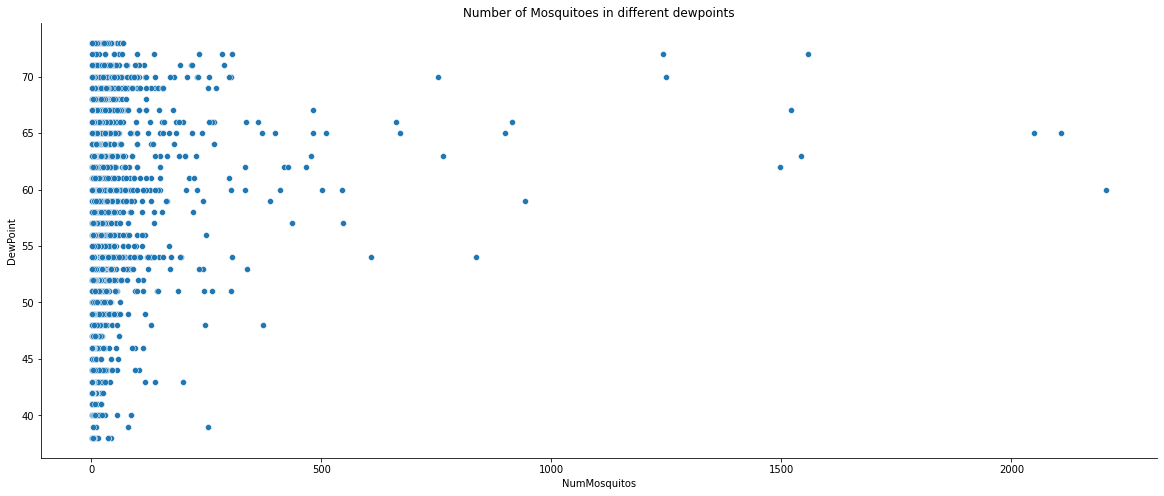

In [ ]:
plt.figure(figsize=(20,8))

plt.title("Number of Mosquitoes in different dewpoints") #please change the title # to?
ax = sns.scatterplot(data = df, x = "NumMosquitos", y='DewPoint')
sns.despine()

Number of mosquitoes are much higher at dew points higher than 60.

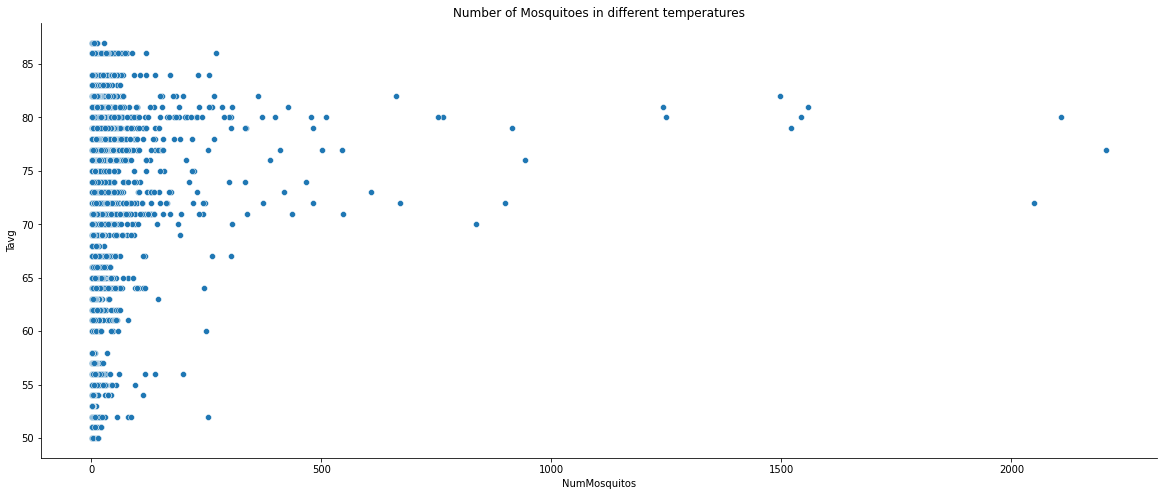

In [ ]:
plt.figure(figsize=(20,8))

plt.title("Number of Mosquitoes in different temperatures") #please change the title
ax = sns.scatterplot(data = df, x = "NumMosquitos", y='Tavg')
sns.despine()

Number of mosquitoes are much higher in temperatures higher than 70 Fahrenheit.

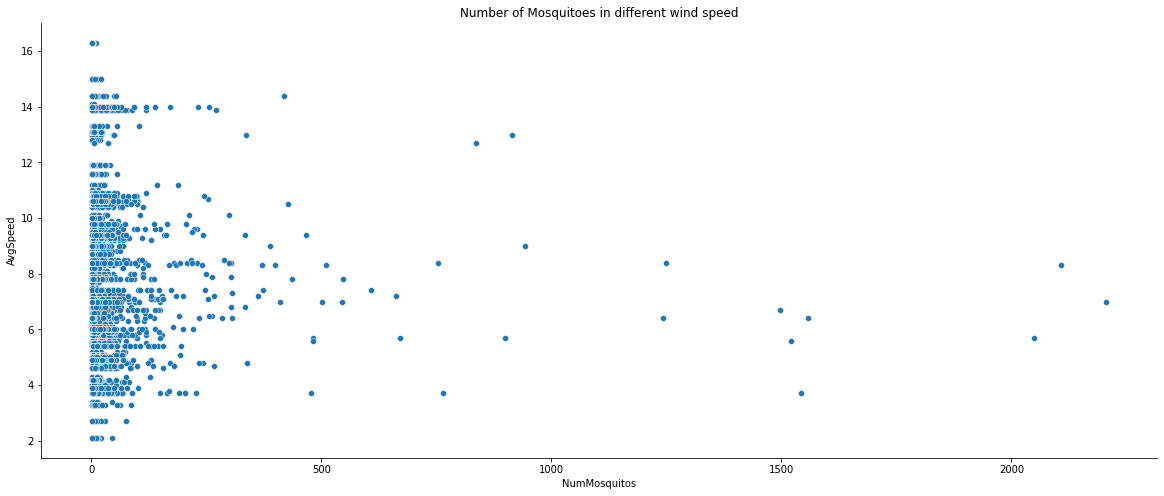

In [ ]:
plt.figure(figsize=(20,8))

plt.title("Number of Mosquitoes in different wind speed") #please change the title
ax = sns.scatterplot(data = df, x = "NumMosquitos", y='AvgSpeed')
sns.despine()

Number of mosquitoes are much higher at wind speed below 10.

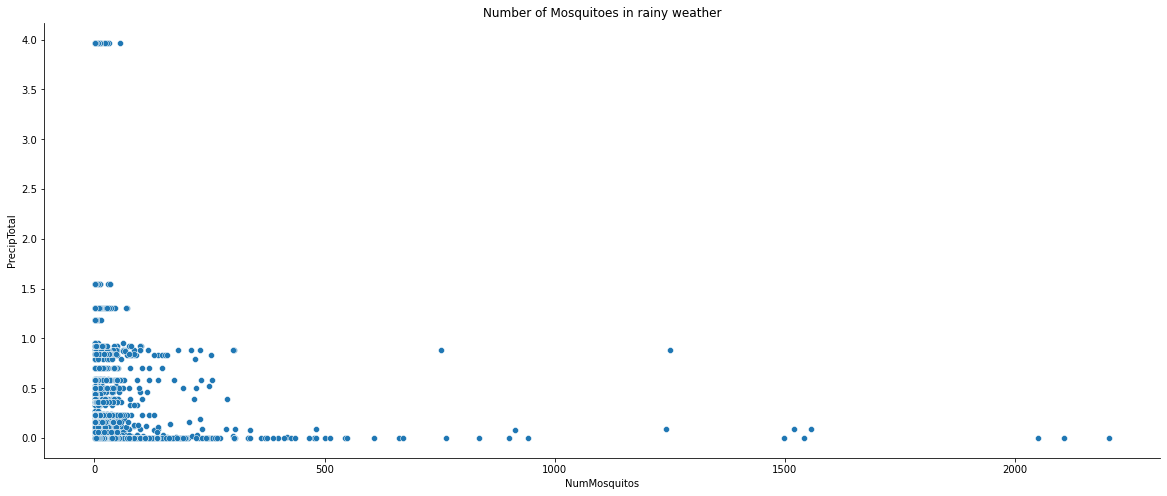

In [ ]:
plt.figure(figsize=(20,8))

plt.title("Number of Mosquitoes in rainy weather") #please change the title
ax = sns.scatterplot(data = df, x = "NumMosquitos", y='PrecipTotal')
sns.despine()

Number of mosquitoes decrease dramatically when PrecipTotal is higher than 1.25.

### 2.0 Features for rolling window for TAvg, DewPoint, PrecipTotal, some feature for sunrise and sunset, and calculate relative humidity

When we looked at the PrecipTotal, the presence of WNV is low, but it peaks around 30 days after the heavy rain. Reason could be the water can stuck and hence breed more mosquito.

In [ ]:
year = [2007,2009,2011,2013]

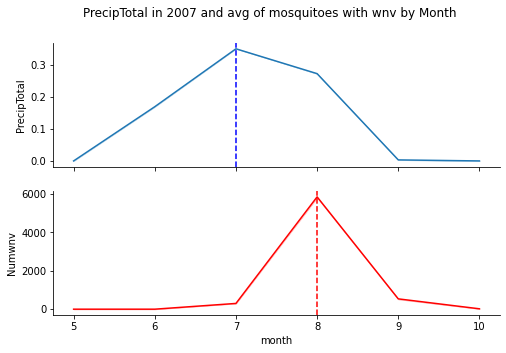

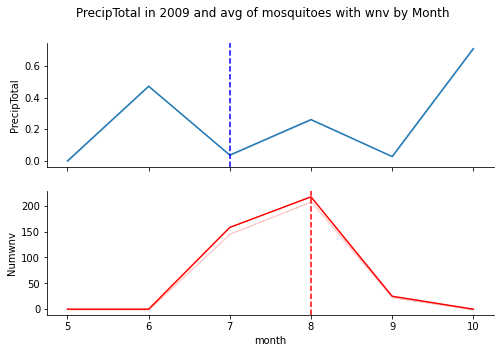

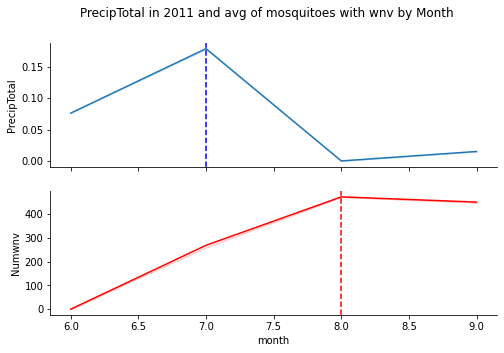

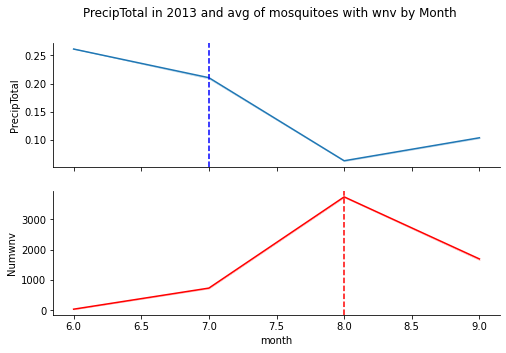

In [ ]:
#Pattern shows heavy rain in month 7(Jul), WNV peak in month 8(Aug) -- except for 2009

for y in year:
 
    fig, axs = plt.subplots(nrows=2,ncols=1 ,sharex=True, figsize=(8,5))

    fig.suptitle(f'PrecipTotal in {y} and avg of mosquitoes with wnv by Month')

    df_yr = df[df["year"]==y]
    sns.lineplot(data=df_yr, x='month', y='PrecipTotal', ax= axs[0], ci=False)
    axs[0].axvline(x= 7 , color='blue', ls='--')

    sns.lineplot(data=df_yr, x='month', y='Numwnv', ax= axs[1], ci=False, color = 'red', estimator = 'sum')
    axs[1].axvline(x= 8 , color='red', ls='--')

    sns.despine()

    #plt.savefig(f'/datasets/wnv_{y}.png', bbox_inches='tight')
    #plt.close(fig);

In [ ]:
#we need to use the weather dataset, as the df has duplicate dates for every station before clustering
df_weather= pd.read_csv("/datasets/data/cleaned_weather.csv")

In [ ]:
#select only fields that we need
df_weather = df_weather[['Date', 'Sunset', 'Sunrise', 'DewPoint', 'PrecipTotal', 'Tavg', 'AvgSpeed']].copy()

In [ ]:
#Grouping with intented aggregation for individual columns
df_weather = df_weather.groupby(by="Date",as_index=False).agg({'DewPoint':'mean','PrecipTotal':'mean','Tavg':'mean','AvgSpeed':'mean', 'Sunrise': 'first','Sunset': 'first'})
df_weather.shape


(1472, 7)

In [ ]:
#add relative humidity
def relhumid(df):
    t = (df['Tavg'] - 32)*(5/9)
    td =(df['DewPoint'] - 32)*(5/9)
    es = 6.11*(10*((7.5*t)/(237.3+t)))
    e = 6.11*(10*((7.5*td)/(237.3+td)))

    return (e/es)*100  

Formula for RelativeHumidity

https://bmcnoldy.rsmas.miami.edu/Humidity.html


In [ ]:
df_weather['RelHumid'] = df_weather.apply(relhumid, axis=1)

In [ ]:
#Need to set the Date as index for rolling window calculation
df_weather['Date'] = pd.to_datetime(df_weather['Date'] )
df_weather.set_index(keys='Date', inplace=True)
df_weather.head()

,DewPoint,PrecipTotal,Tavg,AvgSpeed,Sunrise,Sunset,RelHumid
Date,,,,,,,
2007-05-01,51.0,0.0000,67.5,9.40,448,1849,55.500547
2007-05-02,42.0,0.0000,51.5,13.40,447,1850,52.396521
2007-05-03,40.0,0.0000,57.0,12.55,446,1851,33.250172
2007-05-04,41.5,0.0005,58.0,10.60,444,1852,37.919198
2007-05-05,38.5,0.0010,60.0,11.75,443,1853,24.365257


In [ ]:
#get the mean of the rolling days for Tavg, AvgSpeed, PrecipTotal and RelHumid
for feature in ['Tavg', 'AvgSpeed', 'PrecipTotal', 'RelHumid']:
    for day in [7, 15, 30]:
        df_weather[(feature + '_roll_' + str(day))] = df_weather[feature].rolling(day).mean()

In [ ]:
#check if heavy rain and tag if the rain happened in 7, 15 or 30 number of days ago
df_weather["is_heavyrain"] = df_weather.apply(lambda x: 0 if x['PrecipTotal'] < 0.39  else 1, axis=1)

for i in [7,15,30]: 
    df_weather["heavyrain" + '_past_' + str(i)] = df_weather["is_heavyrain"].rolling(window=i).max()

df_weather = df_weather.fillna(0)

Heavy rain is detemined — when the precipitation rate is > 7.6 mm (0.30 in) per hour,[106] or between 10 mm (0.39 in) and 50 mm (2.0 in) per hour

 [Reference](https://en.wikipedia.org/wiki/Rain#:~:text=Light%20rain%20%E2%80%94%20when%20the%20precipitation,50%20mm%20(2.0%20in)%20per)


In [ ]:
#Create feature for total sunlight 
df_weather['total_sunlight'] = df_weather['Sunset'] - df_weather['Sunrise']

In [ ]:
#drop columns for weather elements after feature creation
df_weather.drop(columns=['Sunset', 'Sunrise', 'DewPoint', 'PrecipTotal', 'AvgSpeed', 'Tavg'], inplace=True)

In [ ]:
df.shape

(8610, 33)

In [ ]:
df_test.shape

(116293, 33)

In [ ]:
#reset index to join with train dataset later
df_weather.reset_index()
df["Date"] = pd.to_datetime(df['Date'])
df = pd.merge(left=df, right=df_weather, how="left", on="Date")

In [ ]:
df_weather.head()

,RelHumid,Tavg_roll_7,Tavg_roll_15,Tavg_roll_30,AvgSpeed_roll_7,AvgSpeed_roll_15,AvgSpeed_roll_30,PrecipTotal_roll_7,PrecipTotal_roll_15,PrecipTotal_roll_30,RelHumid_roll_7,RelHumid_roll_15,RelHumid_roll_30,is_heavyrain,heavyrain_past_7,heavyrain_past_15,heavyrain_past_30,total_sunlight
Date,,,,,,,,,,,,,,,,,,
2007-05-01,55.500547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1401
2007-05-02,52.396521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1403
2007-05-03,33.250172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1405
2007-05-04,37.919198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1408
2007-05-05,24.365257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1410


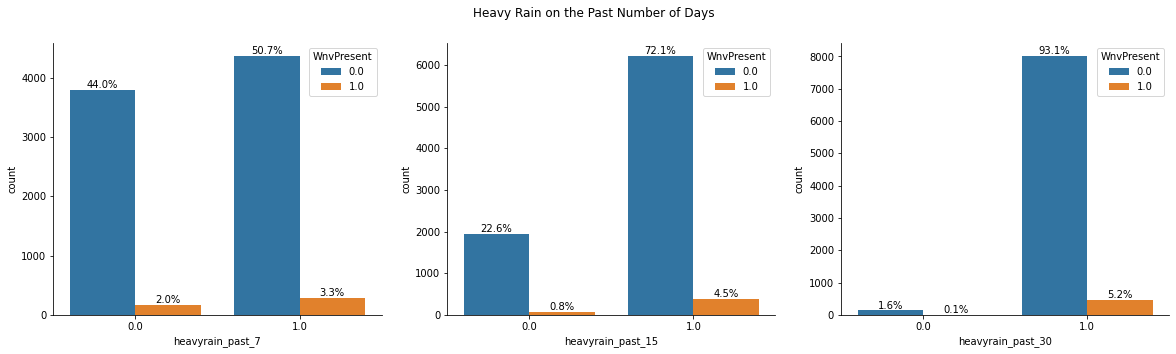

In [ ]:
ncount = len(df)

fig, axs = plt.subplots(nrows=1,ncols=3 ,sharex=True, figsize=(20,5))

fig.suptitle(f'Heavy Rain on the Past Number of Days')

ax = sns.countplot(data = df, x = 'heavyrain_past_7', hue = 'WnvPresent', ax=axs[0])

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.0 * (y/ncount)), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text


ax = sns.countplot(data = df, x = 'heavyrain_past_15', hue = 'WnvPresent', ax=axs[1])

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.0 * (y/ncount)), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

ax = sns.countplot(data = df, x = 'heavyrain_past_30', hue = 'WnvPresent', ax=axs[2])

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.0 * (y/ncount)), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

sns.despine()

The presence of west nile virus was mapped out after certain number of days, 7, 15 and 30. 

## 2. Feature for Date/Time

In [ ]:
#get the date of the year where there's peak of mosquito
df['day_of_year'] = pd.to_datetime(df['Date']).dt.dayofyear
max_day_of_year = df.groupby('day_of_year')['WnvPresent'].sum().idxmax()
print(max_day_of_year)

227


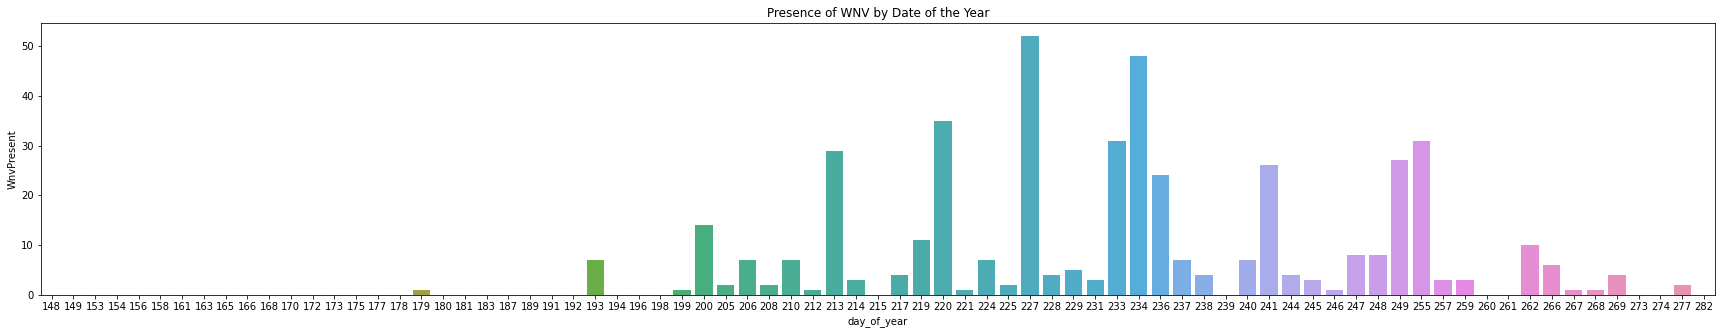

In [ ]:
#Visualize the peak
plt.figure(figsize=(30,5))
plt.title("Presence of WNV by Date of the Year")
ax = sns.barplot(data = df, x = 'day_of_year', y = 'WnvPresent',ci=None,estimator=sum)



In [ ]:
def calculate_day_from_max_day(df):
    df['day_from_max_wnv'] = abs(max_day_of_year - df['day_of_year'])

    return df


#implement for train 
df = calculate_day_from_max_day(df)


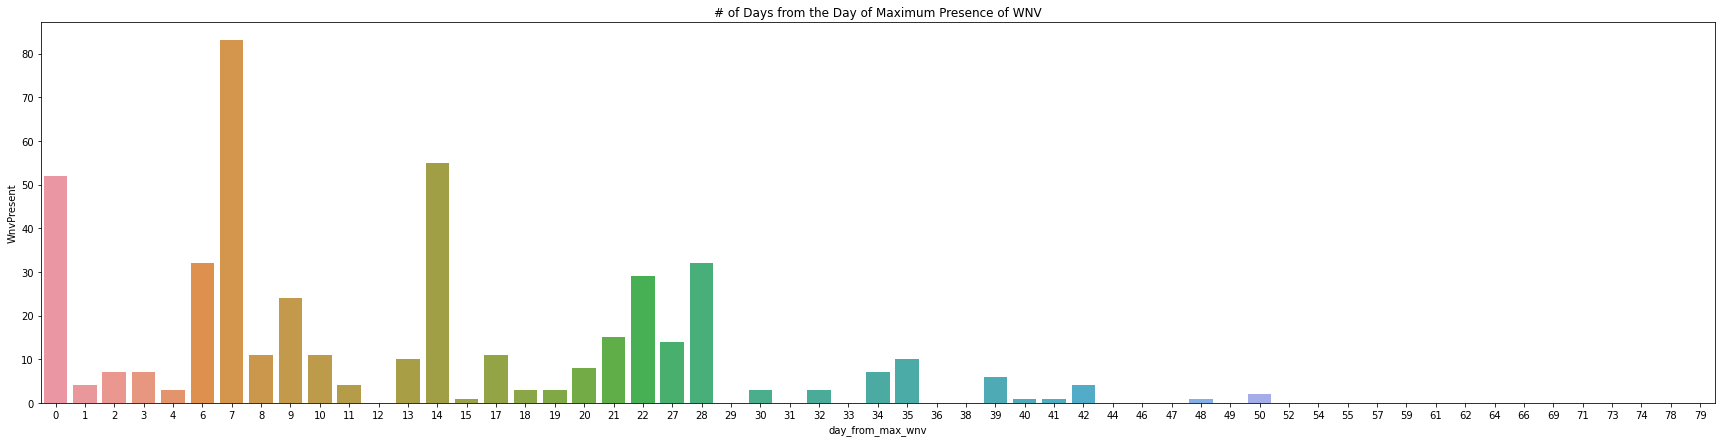

In [ ]:
plt.figure(figsize=(30,7))

plt.title('# of Days from the Day of Maximum Presence of WNV')
ax = sns.barplot(data = df, x = 'day_from_max_wnv', y = 'WnvPresent',ci=None,estimator=sum)

Assumption - The nearer to the day from the maximum presence of WNV, the higher the WNV presence is recorded. The last +-30 days have the most recorded presence of WNV (out of 365 days).



## 3. Feature for Lat/Long

This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points

Ref: https://www.movable-type.co.uk/scripts/latlong.html


Assumption - Locations with high number of virus will have impact on neighboring locations 

In [ ]:
#Reference: https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))

    return h

In [ ]:
#create cluster and identify hotspots 

def dbs_cluster(df):
    latlong = df[['Latitude', 'Longitude']] 
    dbs = DBSCAN(eps=.01, min_samples=5).fit(latlong) 
    #print(dbs.core_sample_indices_)
    return dbs.labels_ 

In [ ]:
#manually check the cluster location with maximum presence of WNV
#lat and long of clusters with highest number of wnvpresent

df["label"] = dbs_cluster(df)

df.groupby('label').agg({"Latitude":"mean","Longitude":"mean",
                        "Numwnv":"sum"}).sort_values(by="Numwnv", ascending=False)


,Latitude,Longitude,Numwnv
label,,,
95,41.974689,-87.890615,2060.0
82,41.673408,-87.599862,1878.0
83,41.726906,-87.585040,766.0
11,41.954690,-87.800991,500.0
37,42.010804,-87.809551,498.0
...,...,...,...
45,41.857402,-87.694991,0.0
44,41.843811,-87.686763,0.0
43,41.846283,-87.656913,0.0


In [ ]:
# create list of hotspot clusters  from top 4 above
hotspots = {'wvn_1':(41.97468899999987, -87.89061500000017), 'wvn_2':(41.67340799999992, -87.59986199999965), 
    'wvn_3':(
41.726905549999934, -87.5850398250002), 'wvn_4':(41.954689999999864, -87.80099100000005)}


#cleanup the temporary feature for clustering
df.drop(columns="label", inplace=True)

In [ ]:
#create function for calculating distance from cluster
def add_distances_from_hotspot(df):
    ''' calculate the distance from the cluster '''

    for name, loc in hotspots.items():
    
        df['haversine_' + name] = haversine_array(df["Latitude"], df['Longitude'],
                                loc[0], loc[1]   #this is Lat/Long from hotspot list
                                )    
    return df


def min_distance(df):

    ''' retain the closest cluster '''

    df["haversine_min"] = np.min([df["haversine_wvn_1"], df["haversine_wvn_2"], df["haversine_wvn_3"], df["haversine_wvn_4"]])

    return df

In [ ]:
#calculate distance from hotspot and the minimum distance 
df = add_distances_from_hotspot(df)
df = df.apply(min_distance, axis=1)

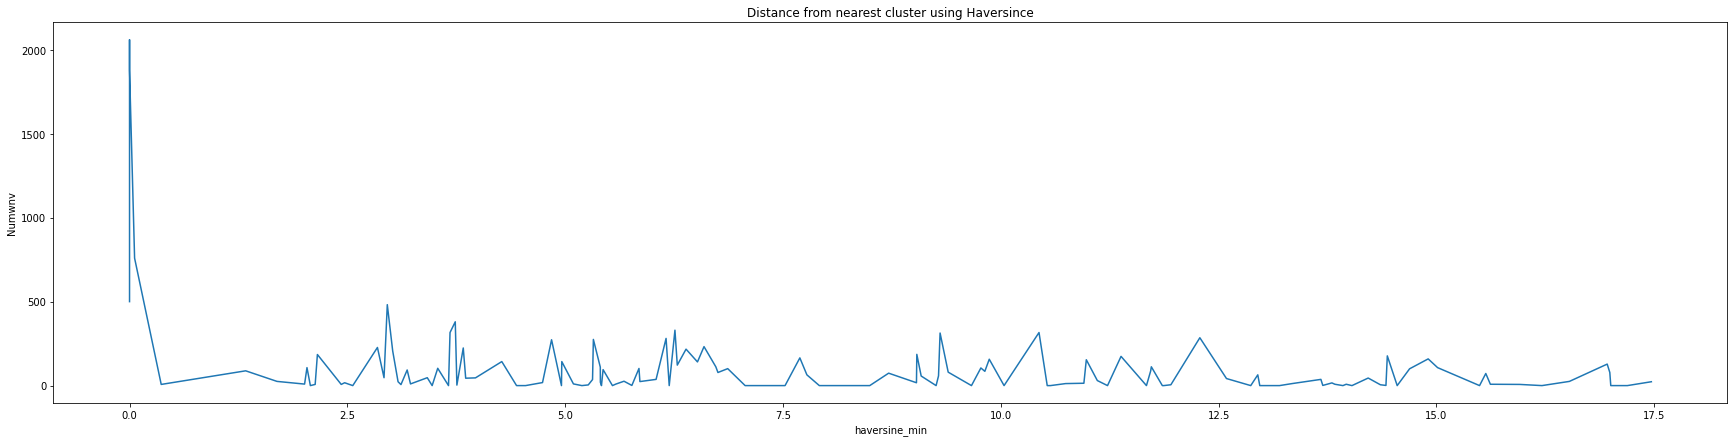

In [ ]:
#visualize
plt.figure(figsize=(30,7))

plt.title('Distance from nearest cluster using Haversince')
ax = sns.lineplot(data = df, x = 'haversine_min', y = 'Numwnv',ci=None,estimator=sum)

Assumption: The nearer to the cluster, the high presence of WNV.

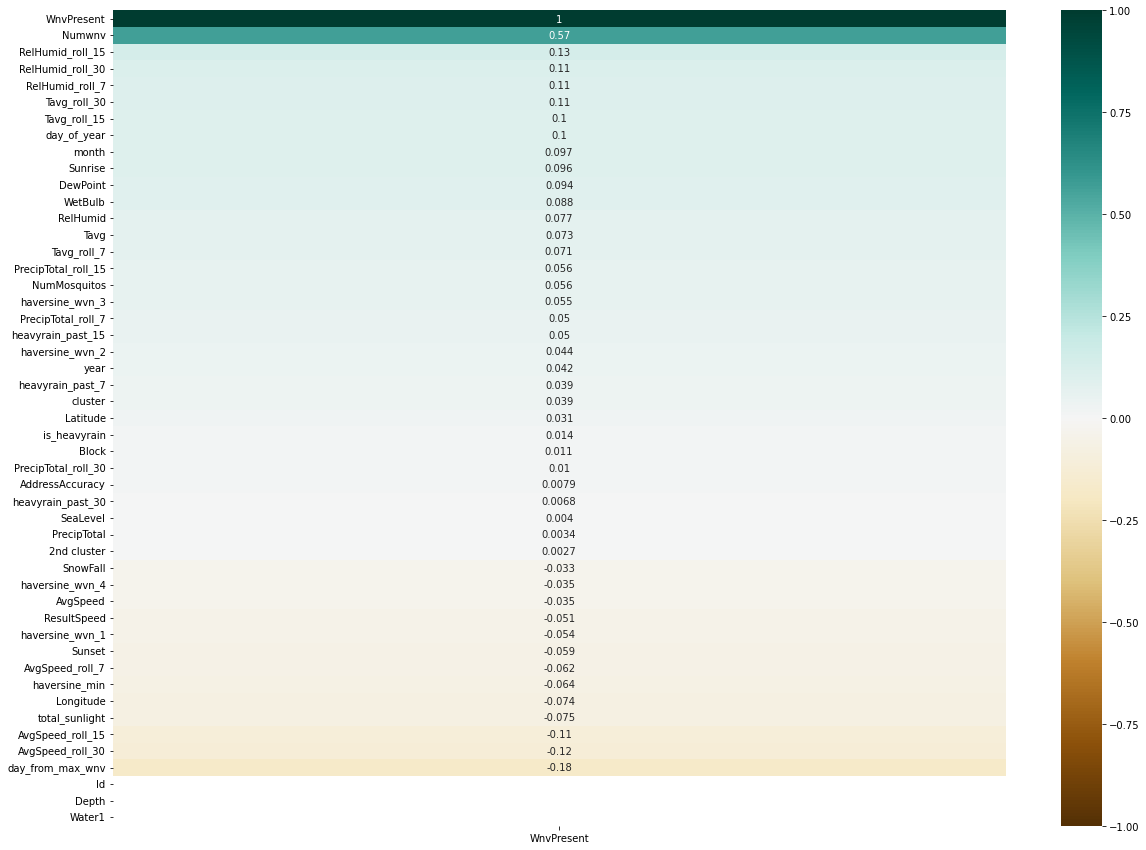

In [ ]:
#analyze corrrelation of newly created features
#d_feature = ['Id','Depth','Block','Latitude','Longitude','AddressAccuracy','year','month','Numwnv']
d_feature = ['Id']
fig, ax = plt.subplots(figsize=(20,15)) 
heatmap = sns.heatmap(df.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), 
vmin=-1, vmax=1, annot=True, cmap='BrBG')


We will consider the correlation in building our model.

## 4. Effectiveness of spraying for WnV carriers in 2011 and 2013


In [ ]:
df_spray= pd.read_csv("/datasets/data/cleaned_spray.csv")

In [ ]:
df_spray['Date'] = pd.to_datetime(df_spray['Date'])
df_spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [ ]:
#Filter for specific year 2011 and 2013
spray_2011 = df_spray[df_spray['Date'].dt.year == 2011]
spray_2013 = df_spray[df_spray['Date'].dt.year == 2013]

In [ ]:
spray_2011dates = spray_2011['Date'].unique()[:2]

#we will categorize it as 0 and 1 under the column is_wnvcarrier
df["is_wnvcarrier"] = df['Species'].map(lambda x:'Carrier' if ((x == "CULEX PIPIENS/RESTUANS") or (x=="CULEX PIPIENS") or (x=="CULEX RESTUANS")) else 'Non-Carrier')
df["Date"] = pd.to_datetime(df['Date'])
NumMos_2011 = df[df['Date'].dt.year==2011].groupby('Date')['NumMosquitos'].sum()
wnvcarrier_2011 = df[df['Date'].dt.year==2011].groupby('Date')['Numwnv'].sum()


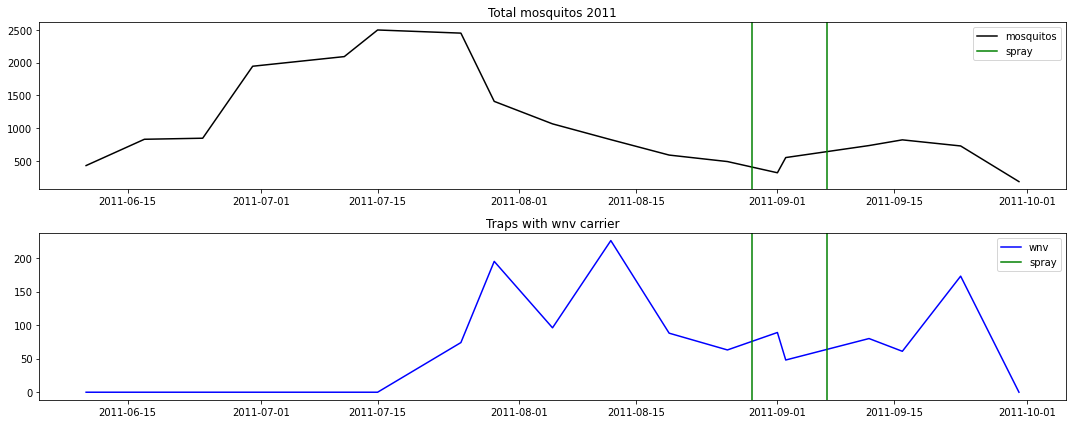

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(15,6))
ax[0].plot(NumMos_2011.index, NumMos_2011.values, color='black')
for Date in spray_2011dates:
    ax[0].axvline(x= Date, color='green', ls='-')
ax[0].set_title('Total mosquitos 2011')
ax[0].legend(['mosquitos','spray'], loc='upper right')


ax[1].plot(wnvcarrier_2011.index,wnvcarrier_2011.values,color='blue')
for Date in spray_2011dates:
    ax[1].axvline(x= Date, color='green', ls='-')
ax[1].set_title('Traps with wnv carrier')
ax[1].legend(['wnv','spray'], loc='upper right')


plt.tight_layout()

In [ ]:
spray_2013dates = spray_2013['Date'].unique()[:8]
NumMos_2013 = df[df['Date'].dt.year==2013].groupby('Date')['NumMosquitos'].sum()
wnvcarrier_2013 = df[df['Date'].dt.year==2013].groupby('Date')['Numwnv'].sum()



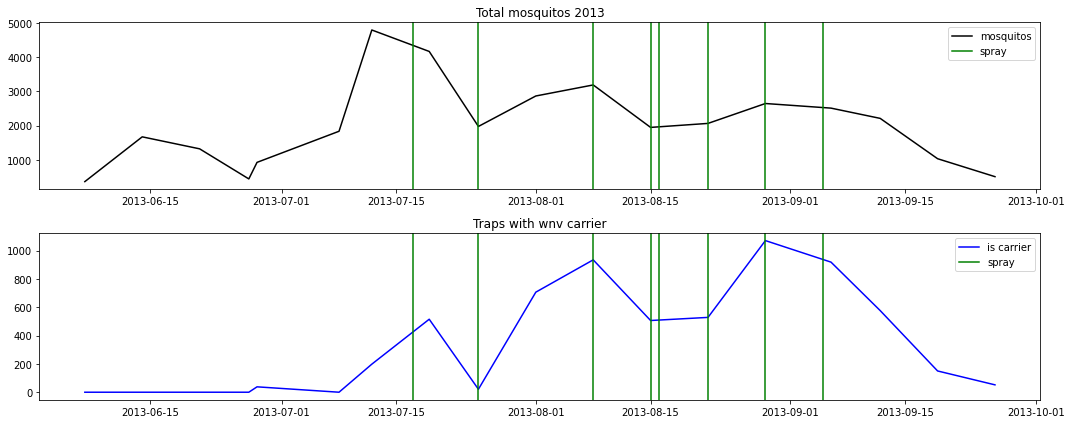

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(15,6))
ax[0].plot(NumMos_2013.index, NumMos_2013.values, color='black')
for Date in spray_2013dates:
    ax[0].axvline(x= Date, color='green', ls='-')
ax[0].set_title('Total mosquitos 2013')
ax[0].legend(['mosquitos','spray'], loc='upper right')


ax[1].plot(wnvcarrier_2013.index,wnvcarrier_2013.values,color='blue')
for Date in spray_2013dates:
    ax[1].axvline(x= Date, color='green', ls='-')
ax[1].set_title('Traps with wnv carrier')
ax[1].legend(['is carrier','spray'], loc='upper right')


plt.tight_layout()

Initial assumption was that spray is an effective substance to kill mosquitoes as well as reducing the cases of WNV.
However, based on the graphs above, it is inconclusive whether the spray data is effective in 2011 and 2013. It was observed that the number of mosquitoes fluctuate consistently after the sprays. Sometimes, the number of mosquitoes increase, other times, the number decreases. Similarly with the counts of traps with wnv carriers, no trend was noticed whether the sprays can decrease the count of wnv carrier. 

## 5. Create Dummies 

Create Dummy for Species and Trap. 
Concat Train/Test Dataset first to get the complete set of fields and to be consistent, then split later to train and test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8610 non-null   datetime64[ns]
 1   Address                 8610 non-null   object        
 2   Species                 8610 non-null   object        
 3   Block                   8610 non-null   float64       
 4   Street                  8610 non-null   object        
 5   Trap                    8610 non-null   object        
 6   AddressNumberAndStreet  8610 non-null   object        
 7   Latitude                8610 non-null   float64       
 8   Longitude               8610 non-null   float64       
 9   AddressAccuracy         8610 non-null   float64       
 10  WnvPresent              8610 non-null   float64       
 11  year                    8610 non-null   float64       
 12  month                   8610 non-null   float64 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    116293 non-null  object 
 1   Address                 116293 non-null  object 
 2   Species                 116293 non-null  object 
 3   Block                   116293 non-null  float64
 4   Street                  116293 non-null  object 
 5   Trap                    116293 non-null  object 
 6   AddressNumberAndStreet  116293 non-null  object 
 7   Latitude                116293 non-null  float64
 8   Longitude               116293 non-null  float64
 9   AddressAccuracy         116293 non-null  float64
 10  WnvPresent              0 non-null       float64
 11  year                    116293 non-null  int64  
 12  month                   116293 non-null  int64  
 13  NumMosquitos            0 non-null       float64
 14  source              

In [ ]:


#Removing Null values and irrevelent to testing dataset
df.drop(columns=['Water1','NumMosquitos','cluster','Month'],inplace=True)
df_test.drop(columns=['Water1','NumMosquitos','cluster','Month'],inplace=True)

#add rolling window for heavy rain, tavg, preciptotal, etc..
df_test["Date"] = pd.to_datetime(df_test['Date'])
df_test = pd.merge(left=df_test, right=df_weather, how="left", on="Date")

#add number of days from the MAX day_of_year with highest presence of WNV
df_test['day_of_year'] = pd.to_datetime(df_test['Date']).dt.dayofyear
df_test = calculate_day_from_max_day(df_test)

#calculate distance from hotspot
df_test = add_distances_from_hotspot(df_test)
df_test = df_test.apply(min_distance, axis=1)

#Categorize wnv carrier species for test dataset
df_test["is_wnvcarrier"] = df_test['Species'].map(lambda x:'Carrier' if ((x == "CULEX PIPIENS/RESTUANS") or (x=="CULEX PIPIENS") or (x=="CULEX RESTUANS")) else 'Non-Carrier')




In [ ]:
#Dropping Address column as we have catergorized as wnv carrier
df.drop(columns=[ 'Address','AddressNumberAndStreet'],inplace=True)
df_test.drop(columns=['Address','AddressNumberAndStreet'],inplace=True)

#haversince and bearing columsn used to calculate the min ditance to the clusters can be dropped  as wells
df.drop(columns=["haversine_wvn_1", "haversine_wvn_2", "haversine_wvn_3", "haversine_wvn_4"], inplace=True)
df_test.drop(columns=["haversine_wvn_1", "haversine_wvn_2", "haversine_wvn_3", "haversine_wvn_4"], inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 116293 non-null  datetime64[ns]
 1   Species              116293 non-null  object        
 2   Block                116293 non-null  float64       
 3   Street               116293 non-null  object        
 4   Trap                 116293 non-null  object        
 5   Latitude             116293 non-null  float64       
 6   Longitude            116293 non-null  float64       
 7   AddressAccuracy      116293 non-null  float64       
 8   WnvPresent           0 non-null       float64       
 9   year                 116293 non-null  int64         
 10  month                116293 non-null  int64         
 11  source               116293 non-null  object        
 12  Id                   116293 non-null  float64       
 13  2nd cluster   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8610 non-null   datetime64[ns]
 1   Species              8610 non-null   object        
 2   Block                8610 non-null   float64       
 3   Street               8610 non-null   object        
 4   Trap                 8610 non-null   object        
 5   Latitude             8610 non-null   float64       
 6   Longitude            8610 non-null   float64       
 7   AddressAccuracy      8610 non-null   float64       
 8   WnvPresent           8610 non-null   float64       
 9   year                 8610 non-null   float64       
 10  month                8610 non-null   float64       
 11  source               8610 non-null   object        
 12  Id                   0 non-null      float64       
 13  2nd cluster          8610 non-nul

In [ ]:
#now they have the same data, concatenate and create dummies

df_concat = pd.concat([df, df_test])
df_concat.shape

(124903, 49)

In [ ]:
#add one more field for the day

df_concat['day'] = pd.to_datetime(df_concat["Date"]).dt.day
df_concat['2nd cluster'] = df_concat["2nd cluster"].astype(str)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124903 entries, 0 to 116292
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 124903 non-null  datetime64[ns]
 1   Species              124903 non-null  object        
 2   Block                124903 non-null  float64       
 3   Street               124903 non-null  object        
 4   Trap                 124903 non-null  object        
 5   Latitude             124903 non-null  float64       
 6   Longitude            124903 non-null  float64       
 7   AddressAccuracy      124903 non-null  float64       
 8   WnvPresent           8610 non-null    float64       
 9   year                 124903 non-null  float64       
 10  month                124903 non-null  float64       
 11  source               124903 non-null  object        
 12  Id                   116293 non-null  float64       
 13  2nd cluster   

In [ ]:
#Create dummies for Codesum
cs_dummy = df_concat['CodeSum'].str.get_dummies( sep=' ')
cs_dummy

,BCFG,BR,DZ,FG,FG+,HZ,RA,TS,TSRA,VCTS
0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
116288,0,1,0,0,0,0,1,0,1,0
116289,0,1,0,0,0,0,1,0,1,0
116290,0,1,0,0,0,0,1,0,1,0
116291,0,1,0,0,0,0,1,0,1,0


In [ ]:
#convert 2nd cluster as str for dummify
df_concat['2nd cluster'] = df_concat['2nd cluster'].astype(str)

#create dummies for Street and Trap
df_dummy = pd.get_dummies(df_concat[['Trap','Street','2nd cluster','is_wnvcarrier']], drop_first=True)
df_concat = pd.concat([df_concat, df_dummy, cs_dummy], axis=1)


In [ ]:
df_concat

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,year,...,BCFG,BR,DZ,FG,FG+,HZ,RA,TS,TSRA,VCTS
0,2007-05-29,CULEX PIPIENS/RESTUANS,11.0,W ROOSEVELT,T048,41.867108,-87.654224,8.0,0.0,2007.0,...,0,1,0,0,0,1,0,0,0,0
1,2007-05-29,CULEX RESTUANS,11.0,W ROOSEVELT,T048,41.867108,-87.654224,8.0,0.0,2007.0,...,0,1,0,0,0,1,0,0,0,0
2,2007-05-29,CULEX RESTUANS,11.0,S PEORIA ST,T091,41.862292,-87.648860,8.0,0.0,2007.0,...,0,1,0,0,0,1,0,0,0,0
3,2007-05-29,CULEX RESTUANS,17.0,W 95TH ST,T094,41.720848,-87.666014,9.0,0.0,2007.0,...,0,1,0,0,0,1,0,0,0,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,41.688324,-87.676709,8.0,0.0,2007.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116288,2014-10-02,CULEX SALINARIUS,21.0,N CANNON DR,T054C,41.925652,-87.633590,8.0,NaN,2014.0,...,0,1,0,0,0,0,1,0,1,0
116289,2014-10-02,CULEX TERRITANS,21.0,N CANNON DR,T054C,41.925652,-87.633590,8.0,NaN,2014.0,...,0,1,0,0,0,0,1,0,1,0
116290,2014-10-02,CULEX TARSALIS,21.0,N CANNON DR,T054C,41.925652,-87.633590,8.0,NaN,2014.0,...,0,1,0,0,0,0,1,0,1,0
116291,2014-10-02,UNSPECIFIED CULEX,21.0,N CANNON DR,T054C,41.925652,-87.633590,8.0,NaN,2014.0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
#split the data to its original set
df_train_orig = df_concat[df_concat['source']== 'Train'].copy()
df_test_orig = df_concat[df_concat['source']== 'Test'].copy()

In [ ]:
#removed dummy columns
#and the colums we use for the dummies -- 'Trap', 'CodeSum', 'Species'
#Dropping 'Date' & 'is_wnvcarrier' will be not relevant to prediction

df_train_orig.drop(columns=['Id','Street','source','CodeSum','day','Trap','day_of_year','Date','Species','is_wnvcarrier','2nd cluster','Numwnv'], inplace=True)
df_test_orig.drop(columns=['WnvPresent', 'Street','source','CodeSum','day','Trap','day_of_year','Date','Species','is_wnvcarrier','2nd cluster','Numwnv'], inplace=True)

**Last step is to confirm that our datasets has the same number of columns**

In [ ]:
df_train_orig.shape

(8610, 364)

In [ ]:
df_test_orig.shape

(116293, 364)

In [ ]:
#save dateset for modelling

df_train_orig.to_csv("/datasets/data/train_modelready.csv", index=False)
df_test_orig.to_csv("/datasets/data/test_modelready.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3abded61-2db4-446b-a02d-565b62921f1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>